In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
pd.set_option('display.max_rows', 500)

In [3]:
survey = pd.read_csv('survey_clean.csv')
survey

,age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,26,male,United Kingdom,No,No,Yes,Unknown,26-100,No,Yes,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,21-30
1247,32,male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,31-65
1248,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,31-65
1249,46,female,United States,No,No,No,Unknown,100-500,Yes,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,31-65


In [4]:
print(survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        1251 non-null   int64 
 1   Gender                     1251 non-null   object
 2   Country                    1251 non-null   object
 3   self_employed              1251 non-null   object
 4   family_history             1251 non-null   object
 5   treatment                  1251 non-null   object
 6   work_interfere             1251 non-null   object
 7   no_employees               1251 non-null   object
 8   remote_work                1251 non-null   object
 9   tech_company               1251 non-null   object
 10  benefits                   1251 non-null   object
 11  care_options               1251 non-null   object
 12  wellness_program           1251 non-null   object
 13  seek_help                  1251 non-null   object
 14  anonymit

In [5]:
#Encoding data
labelDict = {}
for item in survey:
    le = preprocessing.LabelEncoder()
    le.fit(survey[item])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    survey[item] = le.transform(survey[item])
    
    labelKey = 'label_' + item
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

survey.head(500)


,age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,44,0,0,1,1,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,0,0,0,2,4,0,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,0,1,1,1,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,44,0,0,0,0,1,1,1,...,0,1,1,1,2,2,2,0,0,2
5,15,1,44,0,1,0,3,4,0,1,...,0,1,1,2,2,1,0,0,0,2
6,17,0,44,0,1,1,3,0,1,1,...,1,0,0,1,0,1,1,0,0,2
7,21,1,6,0,0,0,0,0,1,1,...,0,1,1,0,0,1,1,1,0,2
8,24,0,44,0,1,1,3,1,0,1,...,3,0,1,2,2,1,0,1,0,2
9,5,1,6,0,0,0,0,2,0,1,...,0,1,1,2,2,0,0,2,0,1


In [6]:
labelDict.items()

dict_items([('label_age', [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]), ('label_Gender', ['female', 'male', 'non-binary']), ('label_Country', ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay']), ('label_self_employed', ['No', 'Yes']), ('label_family_history', ['No', 'Yes']), ('label_treatment', ['No', 'Yes']), ('label_work_interfere', ['Never', 'Often', 'Rar

Text(0.5, 0, 'Age')

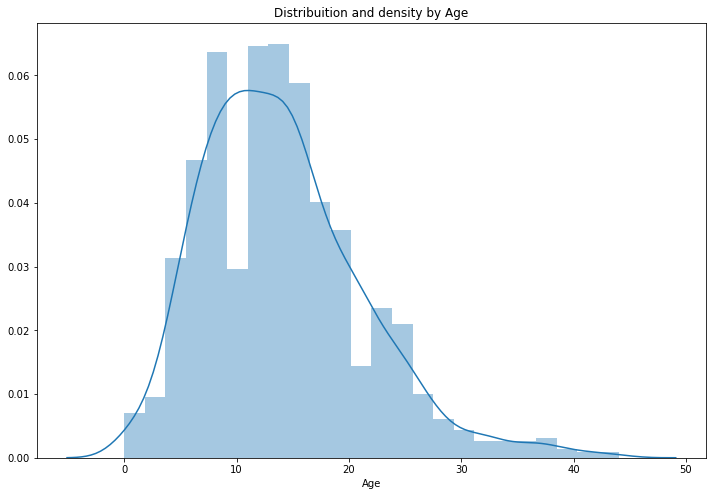

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(survey["age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

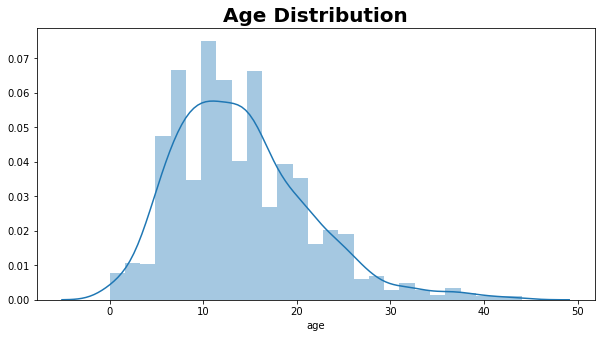

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(survey['age'])
plt.title("Age Distribution",fontsize=20,fontweight="bold")
plt.show()

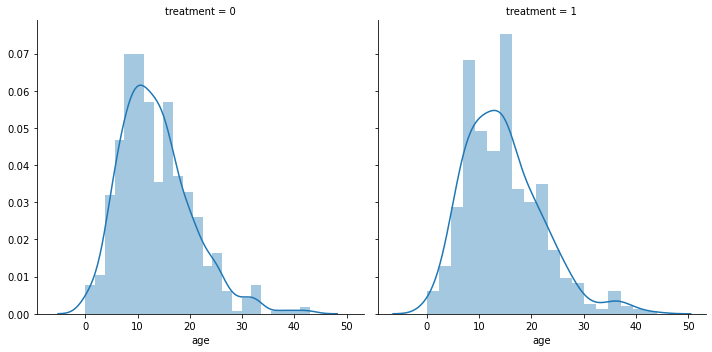

In [33]:
g = sns.FacetGrid(survey, col='treatment', height=5)
g = g.map(sns.distplot, "age")

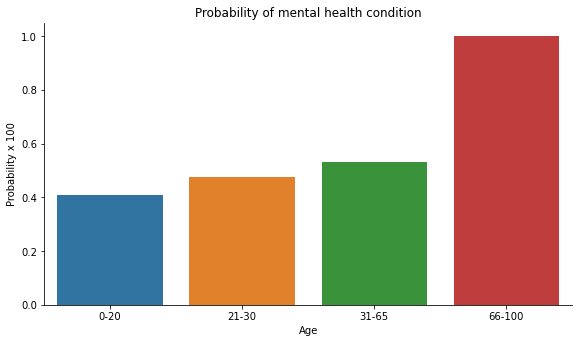

In [46]:
o = labelDict['label_age_range']

g = sns.factorplot(x="age_range", y="treatment", data=survey, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels
#new_labels = labelDict['label_Gender']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

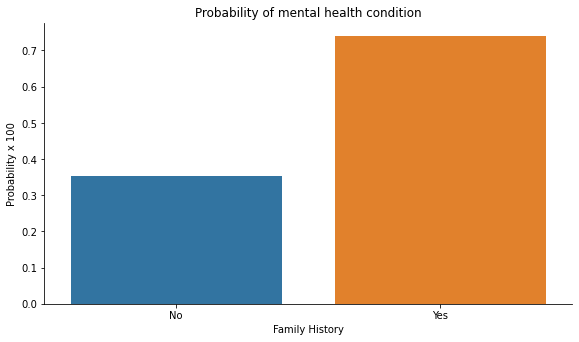

In [52]:
o = labelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", data=survey, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
#new_labels = labelDict['label_Gender']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

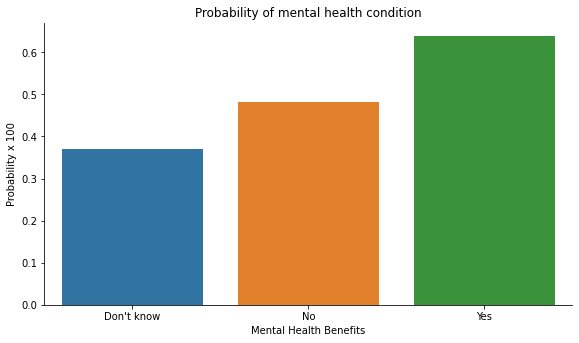

In [51]:
o = labelDict['label_benefits']
g = sns.factorplot(x="benefits", y="treatment", data=survey, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Mental Health Benefits')

# replace legend labels
#new_labels = labelDict['label_Gender']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

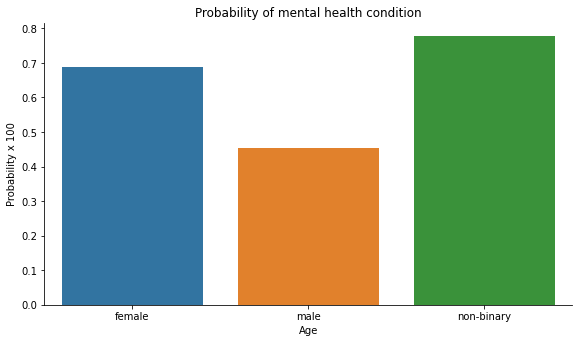

In [49]:
o = labelDict['label_Gender']

g = sns.factorplot(x="Gender", y="treatment", data=survey, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels
#new_labels = labelDict['label_Gender']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()